In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
 

In [10]:
# data
# y = 2*x - 1

x = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([1, 3, 5, 7])
x.shape, y.shape
x

array([[1],
       [2],
       [3],
       [4]])

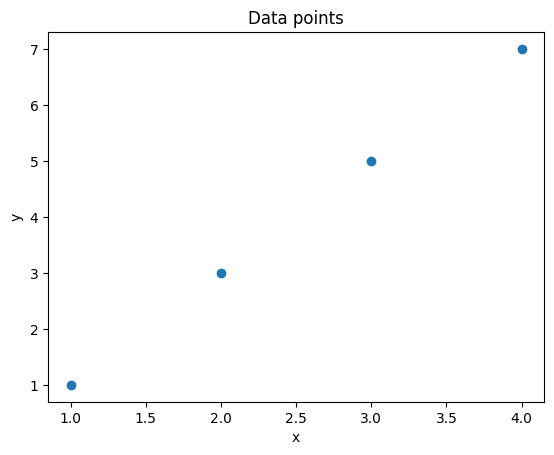

In [6]:
# plot data
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.show()

In [19]:
# model linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# y = m * x + c
m = model.coef_[0]
c = model.intercept_

print(m, c)

2.0 -1.0


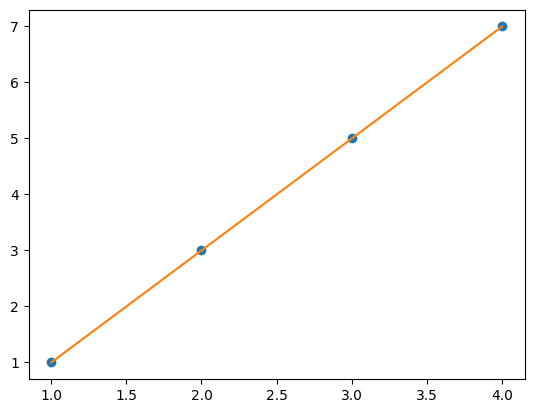

In [25]:
plt.plot(x, y, 'o')
plt.plot(x, model.predict(x))
plt.show()

 

In [30]:
# Prediction

result = model.predict(np.array([[5]]))
print(result)

[9.]


In [ ]:
# next example
#If our data has curvature
# we chose decision tree regression model for this case


In [67]:
years_of_experience = np.array([0, 1, 2, 3, 4, 6, 8, 10]).reshape(-1, 1)
salaries = np.array([30000, 55000, 65000, 70000, 80000, 85000, 87000, 90000]).reshape(-1, 1)


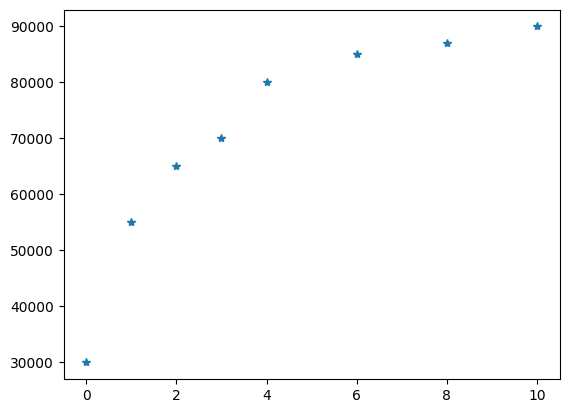

In [69]:
plt.plot(years_of_experience, salaries, '*')
plt.show()

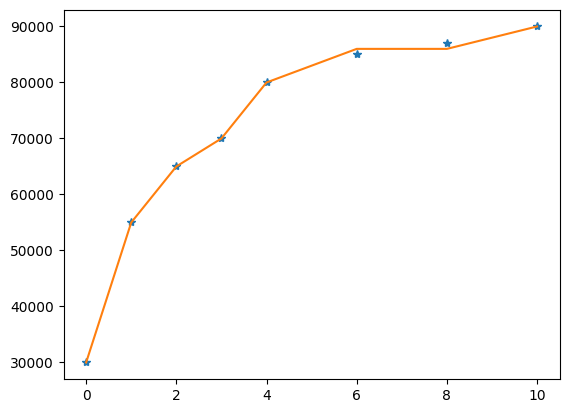

In [72]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=4)
model.fit(years_of_experience, salaries)    

y_predict = model.predict(years_of_experience)

plt.plot(years_of_experience, salaries, '*')
plt.plot(years_of_experience, y_predict)
plt.show()

In [74]:
new_experience = np.array([[5], [9]])
new_salary = model.predict(new_experience)
print(new_salary)

[80000. 86000.]


In [76]:
new_experience = np.array([[10], [15]])
new_salary = model.predict(new_experience)
print(new_salary)

[90000. 90000.]



--- Extrapolation Test Results (Polynomial Regression) ---
Experience (Years): [10 15 20]
Predicted Salary ($): [ 90384.72 155167.61 378351.2 ]


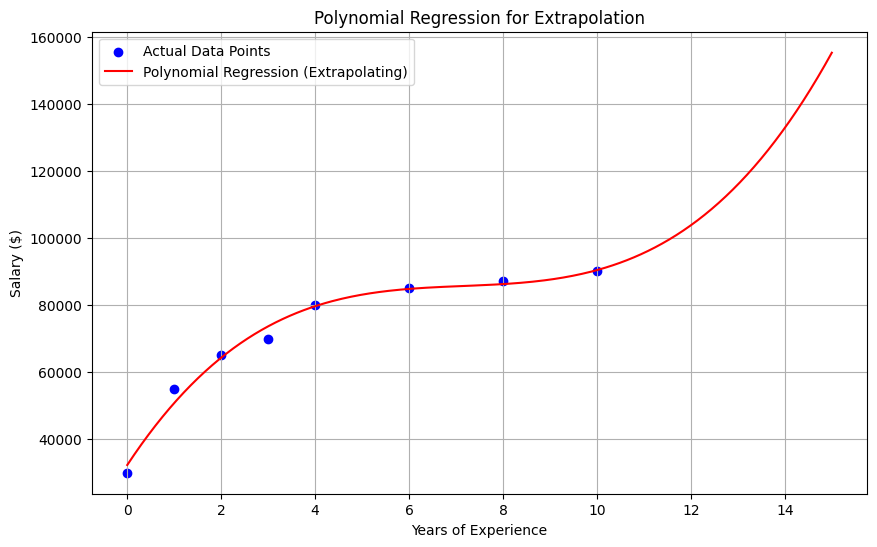

In [86]:
# --- IMPORTANT NOTE ON EXTRAPOLATION ---

# The previous model (DecisionTreeRegressor) capped the prediction
# at the maximum salary seen in the training data (e.g., $90,000)
# because it CANNOT extrapolate (predict outside the known range).

# To predict a higher salary for a new, higher experience (e.g., 15 years),
# we must use a model that can draw a trend line beyond the training data.

# SOLUTION: Use Polynomial Regression (which is a form of Linear Regression 
# applied to transformed features) to model the curved relationship and allow extrapolation.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# 1. DEFINE A NEW MODEL CAPABLE OF EXTRAPOLATION
# We use a pipeline to combine feature transformation (PolynomialFeatures)
# with a linear model (LinearRegression).
# degree=3 is chosen to capture the clear curvature in the data.
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# NOTE: Ensure 'years_of_experience' and 'salaries' are defined and have the same number of rows.
# For demonstration, assuming the original data:
# years_of_experience = np.array([0, 1, 2, 3, 4, 6, 8, 10]).reshape(-1, 1)
# salaries = np.array([30000, 55000, 65000, 70000, 80000, 85000, 88000, 90000])

# 2. TRAIN THE POLYNOMIAL MODEL
poly_model.fit(years_of_experience, salaries)

# 3. TEST EXTRAPOLATION
# Predict for 10, 15, and 20 years of experience.
new_experience_test = np.array([[10], [15], [20]])
extrapolated_salaries = poly_model.predict(new_experience_test)

print(f"\n--- Extrapolation Test Results (Polynomial Regression) ---")
print(f"Experience (Years): {new_experience_test.flatten()}")
print(f"Predicted Salary ($): {extrapolated_salaries.flatten().round(2)}")
# Expected output will show salaries > 90000 for 15 and 20 years.

# 4. PLOT THE NEW MODEL'S PREDICTIONS
# Create a smoother line for visualization up to 15 years
X_plot = np.linspace(0, 15, 300).reshape(-1, 1)
y_poly_pred = poly_model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(years_of_experience, salaries, color='blue', label='Actual Data Points')
plt.plot(X_plot, y_poly_pred, color='red', label='Polynomial Regression (Extrapolating)')
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.title("Polynomial Regression for Extrapolation")
plt.legend()
plt.grid(True)
plt.show()